In [115]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

# Необходимо проанализировать совершенные покупки и ответить на следующие вопросы:

1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)

3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут. (10 баллов)

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (35 баллов)

Для решения задачи проведи предварительное исследование данных и сформулируй, что должно считаться покупкой. Обосновать свой выбор ты можешь с помощью фактов оплат, статусов заказов и других имеющихся данных.

In [116]:
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv', parse_dates = [3,4,5,6,7])
order_items = pd.read_csv('olist_order_items_dataset.csv', parse_dates = [4])

## Проверка данных:

##### Cusromers:

In [117]:
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [118]:
print(f"Data types:\n{customers.dtypes} \n\nNaN in data:\n{customers.isna().sum()}")

Data types:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object 

NaN in data:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


##### Orders:

In [119]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0                    2017-10-18  
1                    2018-08-13  
2                    2018-09-04  
3                    2017-12-15  
4                    2018-02-26

In [120]:
print(f"Data types:\n{orders.dtypes}\n\nNaN in data:\n{orders.isna().sum()}") 

Data types:
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

NaN in data:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


##### Order items:

In [121]:
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14

In [122]:
print(f"Data types:\n{order_items.dtypes}\n\nNaN in data:\n{order_items.isna().sum()}")

Data types:
order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

NaN in data:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


## Анализ данных для того, чтобы сформулировать что считается покупкой:

Предположим что "покупка" это все заказы, которые имеют подтверждение об оплате и в последствии не были отменены.
- Проверим, существуют ли вообще заказы, которые сначала оплатили, а затем отменили (спойлер: да, их 484):

In [123]:
orders.query("order_approved_at.isna() == False and order_status == 'canceled'").head(3)

order_id                       customer_id  \
397   1b9ecfe83cdc259250e1a8aca174f0ad  6d6b50b66d79f80827b6d96751528d30   
613   714fb133a6730ab81fa1d3c1b2007291  e3fe72696c4713d64d3c10afe71e75ed   
1058  3a129877493c8189c59c60eb71d97c29  0913cdce793684e52bbfac69d87e91fd   

     order_status order_purchase_timestamp   order_approved_at  \
397      canceled      2018-08-04 14:29:27 2018-08-07 04:10:26   
613      canceled      2018-01-26 21:34:08 2018-01-26 21:58:39   
1058     canceled      2018-01-25 13:34:24 2018-01-25 13:50:20   

     order_delivered_carrier_date order_delivered_customer_date  \
397                           NaT                           NaT   
613           2018-01-29 22:33:25                           NaT   
1058          2018-01-26 21:42:18                           NaT   

     order_estimated_delivery_date  
397                     2018-08-14  
613                     2018-02-22  
1058                    2018-02-23

- Посмотрим, какие статусы вообще есть у заказов, по которым отсутствует метка об оплате:

In [124]:
orders.query("order_approved_at.isna() == True").order_status.unique()

array(['canceled', 'delivered', 'created'], dtype=object)

Если со статусами canceled и created все понятно (canceled - покупатель мог передумать или возникли проблемы при оплате и система отменила заказ, created - заказ только создан, покупатель в процессе оплаты), то статус delivered немного удивил.

У нас есть заказы, которые были доставлены, но у нас отсутствует метка об оплате товара. 
- Проверим сколько таких заказов:

Таких заказов у нас всего 14 (вот они слева направо), что составляет 0.01% от всех заказов. Также можем заметить "кучность" таких заказов в рамках времененного периода. 

In [125]:
orders.query("order_approved_at.isna() == True and order_status == 'delivered'")

order_id                       customer_id  \
5323   e04abd8149ef81b95221e88f6ed9ab6a  2127dc6603ac33544953ef05ec155771   
16567  8a9adc69528e1001fc68dd0aaebbb54a  4c1ccc74e00993733742a3c786dc3c1f   
19031  7013bcfc1c97fe719a7b5e05e61c12db  2941af76d38100e0f8740a374f1a5dc3   
22663  5cf925b116421afa85ee25e99b4c34fb  29c35fc91fc13fb5073c8f30505d860d   
23156  12a95a3c06dbaec84bcfb0e2da5d228a  1e101e0daffaddce8159d25a8e53f2b2   
26800  c1d4211b3dae76144deccd6c74144a88  684cb238dc5b5d6366244e0e0776b450   
38290  d69e5d356402adc8cf17e08b5033acfb  68d081753ad4fe22fc4d410a9eb1ca01   
39334  d77031d6a3c8a52f019764e68f211c69  0bf35cac6cc7327065da879e2d90fae8   
48401  7002a78c79c519ac54022d4f8a65e6e8  d5de688c321096d15508faae67a27051   
61743  2eecb0d85f281280f79fa00f9cec1a95  a3d3c38e58b9d2dfb9207cab690b6310   
63052  51eb2eebd5d76a24625b31c33dd41449  07a2a7e0f63fd8cb757ed77d4245623c   
67697  88083e8f64d95b932164187484d90212  f67cd1a215aae2a1074638bbd35a223a   
72407  3c0b8706b065f9919d0505d3b3343881  d85919cb3c0529589c6fa617f5f43281   
84999  2babbb4b15e6d2dfe95e2de765c97bce  74bebaf46603f9340e3b50c6b086f992   

      order_status order_purchase_timestamp order_approved_at  \
5323     delivered      2017-02-18 14:40:00               NaT   
16567    delivered      2017-02-18 12:45:31               NaT   
19031    delivered      2017-02-18 13:29:47               NaT   
22663    delivered      2017-02-18 16:48:35               NaT   
23156    delivered      2017-02-17 13:05:55               NaT   
26800    delivered      2017-01-19 12:48:08               NaT   
38290    delivered      2017-02-19 01:28:47               NaT   
39334    delivered      2017-02-18 11:04:19               NaT   
48401    delivered      2017-01-19 22:26:59               NaT   
61743    delivered      2017-02-17 17:21:55               NaT   
63052    delivered      2017-02-18 15:52:27               NaT   
67697    delivered      2017-02-18 22:49:19               NaT   
72407    delivered      2017-02-17 15:53:27               NaT   
84999    delivered      2017-02-18 17:15:03               NaT   

      order_delivered_carrier_date order_delivered_customer_date  \
5323           2017-02-23 12:04:47           2017-03-01 13:25:33   
16567          2017-02-23 09:01:52           2017-03-02 10:05:06   
19031          2017-02-22 16:25:25           2017-03-01 08:07:38   
22663          2017-02-22 11:23:10           2017-03-09 07:28:47   
23156          2017-02-22 11:23:11           2017-03-02 11:09:19   
26800          2017-01-25 14:56:50           2017-01-30 18:16:01   
38290          2017-02-23 03:11:48           2017-03-02 03:41:58   
39334          2017-02-23 07:23:36           2017-03-02 16:15:23   
48401          2017-01-27 11:08:05           2017-02-06 14:22:19   
61743          2017-02-22 11:42:51           2017-03-03 12:16:03   
63052          2017-02-23 03:09:14           2017-03-07 13:57:47   
67697          2017-02-22 11:31:06           2017-03-02 12:06:06   
72407          2017-02-22 11:31:30           2017-03-03 11:47:47   
84999          2017-02-22 11:23:11           2017-03-03 18:43:43   

      order_estimated_delivery_date  
5323                     2017-03-17  
16567                    2017-03-21  
19031                    2017-03-17  
22663                    2017-03-31  
23156                    2017-03-20  
26800                    2017-03-01  
38290                    2017-03-27  
39334                    2017-03-22  
48401                    2017-03-16  
61743                    2017-03-20  
63052                    2017-03-29  
67697                    2017-03-21  
72407                    2017-03-23  
84999                    2017-03-31

- Попробуем немного разобраться что произошло и что с этими покупками:

In [126]:
#создадим тестовый датафрейм
q0_slice = orders \
                 .query("order_approved_at.isna() == True and order_status == 'delivered'") \
                 .merge(order_items, how = 'left', on = 'order_id')

print(f"Number of <<broken>> orders: {q0_slice.order_id.nunique()}\n")
print(f"Number of unique sellers: {q0_slice.seller_id.nunique()}\n")
print(f"Number of unique products: {q0_slice.product_id.nunique()}\n")

#добавим информацию о покупателях
q0_slice = q0_slice.merge(customers, on = 'customer_id', how = 'left' )      
      
print(f"Order items price describe (General Population):\n{order_items.price.describe()}\n\n")    
print(f"Order items price describe (Selection):\n{q0_slice.price.describe()}")    
      

Number of <<broken>> orders: 14

Number of unique sellers: 10

Number of unique products: 12

Order items price describe (General Population):
count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64


Order items price describe (Selection):
count     15.000000
mean     111.362000
std      102.436595
min       28.990000
25%       49.000000
50%       79.990000
75%      134.495000
max      379.000000
Name: price, dtype: float64


Проанализировав данную выборку сложно сделать однозначные выводы об этих заказах и отнести их к какой-либо группе.
- В "подозрительной" выборке не обнаружено аномалий: у покупателей разные штаты, города, адреса, продавцы, вес, стоимость товаров адекватны.

Поэтому учитывая несущественный размер данной выборки в дальнейших расчетах эти заказы будут исключены. На данный момент спишем на баг системы и для того чтобы в нем разобраться нам недостаточно данных.

### Проанализировав имеющиеся данные, за покупку будем считать оплаченные заказы, вне статусов "canceled", "unavailable". 
Т.к. факт оплаты запускает процесс передачи заказа покупателю. 

## Подготовка данных для дальнейшего анализа:

In [127]:
#Оставим данные только о нужных нам заказах:
orders_corr = orders.query("order_status not in ('canceled','unavailable') and order_approved_at.isna() == False")

## 1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [128]:
# Объединим информацию об покупателях с их заказами
# Сгруппируем данные по покупателям
# Для каждого покупателя посчитаем количество покупок
q1 = customers \
.merge(orders_corr, how = 'left', on = 'customer_id')[['customer_unique_id','order_id']] \
.groupby('customer_unique_id', as_index = False) \
.agg({'order_id':'count'}) \
.rename(columns = {"order_id":'count_orders'}) \
.sort_values('count_orders', ascending = False)

#Отберем покупателей с одной покупкой
customers_with_1_order = q1.query("count_orders == 1").shape[0]

print(f"Пользователей, совершивших только одну покупку: {customers_with_1_order}")

Пользователей, совершивших только одну покупку: 92087


## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 

Условно разделим состояние заказа на несколько этапов:
- Подготовка (статусы: created, approved, invoiced)
- В процессе (статусы: processing, shipped)
- Закрыт (статусы: delivered, unavailable, canceled)

Рассмотрим только конечное состояние заказа, т.е. статусы: delivered, unavailable, canceled.
Нас интерсуют только недоставленные заказы, поэтому будем считать что недоставленным заказом считаются заказы со статусами "canceled", "unavailable". 

Из того что заказ отменен следует, то что он недоставлен. 
А статус unavailable необходимо дополнительно проанализировать. 



In [129]:
# Для расчетов возьмем заказы в статусах canceled и unavailable из исходного датафрейма с заказами
q2 = orders.query("order_status in ('canceled', 'unavailable')").copy()

##### Проанализируем статус 'unavailable':

In [130]:
#Всего заказов в статусе unavailable
q2.query("order_status == 'unavailable'").shape[0]

609

In [131]:
#Проверим сколько уникальных значений принимаем поле "время передачи заказа в логистическую службу"
q2.query("order_status == 'unavailable'").order_delivered_carrier_date.nunique()

0

In [132]:
##Проверим сколько уникальных значений принимаем поле "время доставки заказа"
q2.query("order_status == 'unavailable'").order_delivered_customer_date.nunique()

0

Заказы в статусе "unavailable" не были переданы в доставку, не были переданы покупателю.

In [133]:
#Добавим к этим заказам информацию про товары и попробуем найти ответы
q2_order_detal = q2.merge(order_items, how = 'left', on = 'order_id')

In [134]:
#Посмотрим какой вес товаров в жтих заказах:
q2_order_detal.query("order_status == 'unavailable'").freight_value.unique()

array([  nan, 28.78, 13.68, 10.96, 25.33, 20.85,  9.12, 24.08])

In [135]:
order_items.freight_value.describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

In [136]:
#Оценим разнообразие продуктов в заказе:
q2_order_detal.product_id.describe()

count                                  549
unique                                 442
top       8397dc503d1a0c2ac7422701884de5a6
freq                                     6
Name: product_id, dtype: object

In [137]:
#Оценим разнообразие продавцов в заказе:
q2_order_detal.seller_id.describe()

count                                  549
unique                                 334
top       cc419e0650a3c5ba77189a1882b7556a
freq                                     9
Name: seller_id, dtype: object

In [138]:
#Оценим разнообразие покупателей в заказе:
q2_order_detal.customer_id.describe()

count                                 1316
unique                                1234
top       e91409937a0fd26a57310548858d1762
freq                                     6
Name: customer_id, dtype: object


По полученным данным можем сказать, что заказы со статусом 'unavailable' - те заказы, которые не были переданы в службу доставки. 

Среди заказов со статусом unavailable, также есть заказы с пустыми значениями:
- order_item_id 
- product_id 
- seller_id 
- shipping_limit_date 
- price
- freight_value 

Среди имеющихся значений аномалий не обнаружено.

#### После проведения дополнительного анализа статуса unavailable изначальное утверждение не изменилось. Недоставленными заказами будем считать заказы в статусах "canceled" и "unavailable".

In [139]:
# Приведем колонку с датой покупки к типу ГГ-ММ-ДД
q2['order_purchase_timestamp'] = q2['order_purchase_timestamp'] - pd.offsets.MonthBegin(1)
q2['order_purchase_timestamp'] = q2['order_purchase_timestamp'].apply(lambda x: x.date())
q2['order_purchase_timestamp'] = pd.to_datetime(q2['order_purchase_timestamp'], format='%Y-%m-%d')

In [140]:
#Сгруппируем данные по дате заказа и статусу
#Посчитаем количество заказов 
q2_uoc = q2 \
            .groupby(['order_purchase_timestamp', 'order_status'],as_index = False) \
            .agg({'order_id':'count'}) \
            .rename(columns = {'order_id':'count_orders'})

In [141]:
#Посчитаем сколько в среднем заказов не доставлено: в месяц
#в месяц в статусе unavailable
#в месяц в статусе canceled
undelivered_orders_mean = round(q2_uoc \
                                .groupby('order_purchase_timestamp', as_index = False) \
                                .agg({'count_orders':'sum'}) \
                                .count_orders.mean(),2)
undev_unav_mean = round(q2_uoc.query("order_status == 'unavailable'").count_orders.mean(),2)
undev_canc_mean = round(q2_uoc.query("order_status == 'canceled'").count_orders.mean(),2)

print(f"В среднем недоставленных заказов в месяц: {undelivered_orders_mean}")
print(f"В среднем недоставленных заказов в месяц (не передано в доставку): {undev_unav_mean}")
print(f"В среднем недоставленных заказов в месяц (по причине отмены): {undev_canc_mean}")

В среднем недоставленных заказов в месяц: 51.42
В среднем недоставленных заказов в месяц (не передано в доставку): 29.0
В среднем недоставленных заказов в месяц (по причине отмены): 26.04


In [142]:
fig = px.histogram(q2_uoc, x="order_purchase_timestamp", y="count_orders",
             color='order_status', barmode='group',
             height=400)
fig.show()

#### Сводная информация по недоставленным заказам:

In [144]:
q2_order_detal

order_id                       customer_id  \
0     8e24261a7e58791d10cb1bf9da94df5c  64a254d30eed42cd0e6c36dddb88adf0   
1     1b9ecfe83cdc259250e1a8aca174f0ad  6d6b50b66d79f80827b6d96751528d30   
2     c272bcd21c287498b4883c7512019702  9582c5bbecc65eb568e2c1d839b5cba1   
3     714fb133a6730ab81fa1d3c1b2007291  e3fe72696c4713d64d3c10afe71e75ed   
4     37553832a3a89c9b2db59701c357ca67  7607cd563696c27ede287e515812d528   
...                                ...                               ...   
1311  aaab15da689073f8f9aa978a390a69d1  df20748206e4b865b2f14a5eabbfcf34   
1312  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
1313  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
1314  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
1315  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

     order_status order_purchase_timestamp   order_approved_at  \
0     unavailable      2017-11-16 15:09:28 2017-11-16 15:26:57   
1        canceled      2018-08-04 14:29:27 2018-08-07 04:10:26   
2     unavailable      2018-01-31 11:31:37 2018-01-31 14:23:50   
3        canceled      2018-01-26 21:34:08 2018-01-26 21:58:39   
4     unavailable      2017-08-14 17:38:02 2017-08-17 00:15:18   
...           ...                      ...                 ...   
1311  unavailable      2018-01-16 14:27:59 2018-01-17 03:37:34   
1312     canceled      2018-08-31 16:13:44                 NaT   
1313     canceled      2018-09-06 18:45:47                 NaT   
1314  unavailable      2017-08-23 16:28:04 2017-08-28 15:44:47   
1315  unavailable      2017-10-10 10:50:03 2017-10-14 18:35:57   

     order_delivered_carrier_date order_delivered_customer_date  \
0                             NaT                           NaT   
1                             NaT                           NaT   
2                             NaT                           NaT   
3             2018-01-29 22:33:25                           NaT   
4                             NaT                           NaT   
...                           ...                           ...   
1311                          NaT                           NaT   
1312                          NaT                           NaT   
1313                          NaT                           NaT   
1314                          NaT                           NaT   
1315                          NaT                           NaT   

     order_estimated_delivery_date  order_item_id  \
0                       2017-12-05            NaN   
1                       2018-08-14            1.0   
2                       2018-02-16            NaN   
3                       2018-02-22            1.0   
4                       2017-09-05            NaN   
...                            ...            ...   
1311                    2018-02-06            NaN   
1312                    2018-10-01            NaN   
1313                    2018-09-27            NaN   
1314                    2017-09-15            NaN   
1315                    2017-10-23            NaN   

                            product_id                         seller_id  \
0                                  NaN                               NaN   
1     ad673c1cd02b966e931f9db4fdc34791  9646c3513289980f17226a2fc4720dbd   
2                                  NaN                               NaN   
3     a0b7d5a992ccda646f2d34e418fff5a0  95f83f51203c626648c875dd41874c7f   
4                                  NaN                               NaN   
...                                ...                               ...   
1311                               NaN                               NaN   
1312                               NaN                               NaN   
1313                               NaN                               NaN   
1314                               NaN                               NaN   
1315                               NaN        

### Дополнительная информация по отменным заказам:

#### Продукты в отмененных заказах:

In [145]:
top_canceled_product = q2_order_detal \
.groupby('product_id', as_index = False ) \
.agg({'order_id':'count'}) \
.sort_values('order_id', ascending = False) \
.rename(columns = {'order_id':'canceled_count'})

In [146]:
top_canceled_product.canceled_count.describe()

count    442.000000
mean       1.242081
std        0.772394
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        6.000000
Name: canceled_count, dtype: float64

In [147]:
top_canceled_product[top_canceled_product.canceled_count >= 5]

product_id  canceled_count
211  8397dc503d1a0c2ac7422701884de5a6               6
155  5c3eaf54e8ee5d5378765ff16df7640b               6
40   1c42962612d557f85753b24c2b97070f               5
175  66b1f09e746c05761bcaccf6339bde8d               5
258  99b4367cf2228c8a86922a0649bee6b8               5
206  7d4f932dd4fa16256c20de073329eacc               5
98   3ea32f63a6aaf8d467e543dedf434ee7               5
195  75f3ef6a5cb0f2d5aeef15925f0ccf69               5
325  c3a52053718435a35e070b991ff546ec               5
404  ed08ea04c92f5f434c2362f7310fb328               5

#### Продавцы в отмененных заказах:

In [149]:
top_canceled_sellers = q2_order_detal \
.groupby('seller_id', as_index = False ) \
.agg({'order_id':'count'}) \
.sort_values('order_id', ascending = False) \
.rename(columns = {'order_id':'canceled_count'})

In [150]:
top_canceled_sellers.canceled_count.describe()

count    334.000000
mean       1.643713
std        1.322707
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        9.000000
Name: canceled_count, dtype: float64

In [151]:
top_canceled_sellers[top_canceled_sellers.canceled_count >= 7]

seller_id  canceled_count
254  cc419e0650a3c5ba77189a1882b7556a               9
111  620c87c171fb2a6dd6e8bb4dec959fc6               9
114  6560211a19b47992c3666cc44a7e94c0               8
6    0adac9fbd9a2b63cccaac4f8756c1ca8               7
176  8a32e327fe2c1b3511609d81aaf9f042               7

#### Покупатели в отмененных заказах:

In [152]:
top_canceled_buyers = q2_order_detal \
.groupby('customer_id', as_index = False ) \
.agg({'order_id':'count'}) \
.sort_values('order_id', ascending = False) \
.rename(columns = {'order_id':'canceled_count'})

In [153]:
top_canceled_buyers.canceled_count.describe()

count    1234.000000
mean        1.066451
std         0.439855
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: canceled_count, dtype: float64

In [154]:
top_canceled_buyers[top_canceled_buyers.canceled_count >= 5]

customer_id  canceled_count
1021  d9335c099e6943d88ac5f8a7cb418b66               6
924   c52f8523a6448c43354e5ca966f61e4c               6
1102  e91409937a0fd26a57310548858d1762               6
466   672510553bcfbf72de694db2cd88f046               5
447   6391b6b3125ec6fbe82bf0e2d616337f               5
528   727ab4449f530b9af13f40fa8e528bff               5
297   44d53248bdd39a477bcf6278e73a2844               5
870   b9067875e231cbef9ac17a3a366a0bc6               5
381   55c72a24117236fa6e1e89bb2b4a02e0               5
13    0340b2de09f18a986fea9f26cc7b2d9c               5

#### Аномалий среди товаров, продавцов и покупателей не обнаружено. Доля отмен на уникальную единицу (товар/продавец/покупатель) не превышает 2.7%.

### Товары доставленные после установленных сроков:

In [155]:
#Отберем среди состоявшихся покупок только те что были доставлены после обещанной даты
q2_ext = orders_corr.query('order_estimated_delivery_date < order_delivered_customer_date').copy()

In [156]:
q2_ext['order_purchase_timestamp'] = q2_ext['order_purchase_timestamp'] - pd.offsets.MonthBegin(1)
q2_ext['order_purchase_timestamp'] = q2_ext['order_purchase_timestamp'].apply(lambda x: x.date())
q2_ext['order_purchase_timestamp'] = pd.to_datetime(q2_ext['order_purchase_timestamp'], format='%Y-%m-%d')

In [157]:
#Сгруппируем по дате заказа 
#Посчитаем количество задержанных заказов
q2_delays_by_month = q2_ext \
.groupby('order_purchase_timestamp', as_index = False) \
.agg({'order_id':'count'}) \
.rename(columns = {'order_id':'delays_count'}) \
.sort_values('delays_count', ascending = False)

In [164]:
fig = px.histogram(q2_delays_by_month, x="order_purchase_timestamp", y="delays_count", nbins = 36)
fig.show()

По данному графику сложно сказать, чем вызваны задержки. Можем предположить, что в связи с какими-то событиями (пр. праздники), заказов стало больше, поэтому логистическая служба не справлялась с нагрузкой. Попробуем проверить гипотезу:

In [158]:
#Сделаем новый дф для теста
q2_add_test = orders_corr.copy()

In [159]:
#Приведем дату заказа к типа ГГ-ММ-ДД
q2_add_test['order_purchase_timestamp'] = q2_add_test['order_purchase_timestamp'] - pd.offsets.MonthBegin(1)
q2_add_test['order_purchase_timestamp'] = q2_add_test['order_purchase_timestamp'].apply(lambda x: x.date())
q2_add_test['order_purchase_timestamp'] = pd.to_datetime(q2_add_test['order_purchase_timestamp'], format='%Y-%m-%d')

In [160]:
#Сгруппируем заказы по дате создания
#Посчитаем количество заказов в месяц
q2_add_test = q2_add_test \
.groupby('order_purchase_timestamp', as_index = False) \
.agg({'order_id':'count'}) \
.rename(columns = {'order_id':'orders_count'}) 

In [161]:
#Объединим с прошлыми расчетами
q2_delays_by_month = q2_delays_by_month.merge(q2_add_test, on = 'order_purchase_timestamp', how = 'inner')

In [162]:
#Посчитаем коэффициент задержек по месяцам
q2_delays_by_month['ratio'] = q2_delays_by_month.delays_count/q2_delays_by_month.orders_count

In [163]:
q2_delays_by_month.sort_values('order_purchase_timestamp', ascending = False)

order_purchase_timestamp  delays_count  orders_count     ratio
3                2018-08-01           620          6113  0.101423
8                2018-07-01           316          6380  0.049530
17               2018-06-01            81          6122  0.013231
4                2018-05-01           549          6763  0.081177
7                2018-04-01           350          6966  0.050244
0                2018-03-01          1440          7103  0.202731
1                2018-02-01          1109          6668  0.166317
5                2018-01-01           475          7342  0.064696
6                2017-12-01           433          5417  0.079934
2                2017-11-01          1070          7586  0.141049
9                2017-10-01           240          4530  0.052980
10               2017-09-01           211          4196  0.050286
13               2017-08-01           140          4264  0.032833
14               2017-07-01           139          4031  0.034483
16               2017-06-01           119          3161  0.037646
15               2017-05-01           126          3648  0.034539
11               2017-04-01           183          2426  0.075433
12               2017-03-01           141          2589  0.054461
18               2017-02-01            56          1735  0.032277
19               2017-01-01            24           851  0.028202
20               2016-10-01             3           293  0.010239
21               2016-09-01             1             2  0.500000

Данные специально отсортировал по дате, чтобы акцентировать внимание на том что количество заказов находится на высоком уровне уже продолжительный срок, но проблемы были лишь в некоторые из месяцев. Судя по последним месяцам проблема решена. Но требуется больше анализа.

In [165]:
fig = px.histogram(q2_delays_by_month, x="order_purchase_timestamp", y="ratio", nbins = 36)
fig.show()

##### При необходимости можно уточнить в какие страны, какие товары, к каким покупателям чаще всего заказы доставлялись с задержкой.

## 3. По каждому товару определить, в какой день недели товар чаще всего покупается. 

In [166]:
#Создаем датафрейм сосоящий из заказов и товарам из заказа
q3 = orders_corr.merge(order_items, how = 'left', on = 'order_id')[['product_id','order_purchase_timestamp']]

In [167]:
#Добавляем колонку с днем недели
q3['day_name'] = q3.order_purchase_timestamp.dt.day_name()

In [168]:
#Группируем данные по продукту и дню недели
#Считаем количество заказов товара
product_dow_count = q3.groupby(['product_id','day_name'], as_index = False) \
.agg({'order_purchase_timestamp':'count'}) \
.rename(columns = {'order_purchase_timestamp':'purch_count'}) \
.sort_values('purch_count', ascending = False)

In [169]:
#Находим максильманое количество покупок
product_dow_freq = product_dow_count \
.groupby('product_id', as_index = False) \
.agg(max_freq = ("purch_count", "max"))

In [170]:
#Добавляем колонку к изначальному дф
product_dow_max = product_dow_count.merge(product_dow_freq, how = 'inner', on = 'product_id')

In [171]:
#Оставляем только те дни, где количество заказов равно максимуму
#Группируем данные по продукту
#Т.к. максимумов может быть несколько, объединяем дни в список
#Возвращаем колонку с количеством заказов для наглядности
product_popular_dow = product_dow_max \
.query("purch_count == max_freq") \
.groupby('product_id')['day_name'] \
.apply(list) \
.reset_index() \
.merge(product_dow_freq, on = 'product_id', how = 'left') \
.sort_values('max_freq', ascending = False)

### День недели, в который товар чаще всего покупается:

In [172]:
product_popular_dow

product_id               day_name  max_freq
8553   422879e10f46682990de24d770e7f83d            [Wednesday]        93
19597  99a4788cb24856965c36a24e339b6058               [Monday]        92
21957  aca2eb7d00ea1a7b8ebd4e68314663af             [Thursday]        89
10787  53b36df67ebb7c41585e8d54d6772e08              [Tuesday]        76
7032   368c6c730842d78016ad823897a372db               [Friday]        67
...                                 ...                    ...       ...
12673  62b0e890638d64f8e51e7418813fea07   [Thursday, Saturday]         1
12672  62b0aaa3af54c1599523aa7505ac5216             [Thursday]         1
12671  62b07aff118f62756ee579afeedc3eb0  [Thursday, Wednesday]         1
12670  62ae6a8f5789aec14529a277c7516def               [Sunday]         1
32725  fffe9eeff12fcbd74a2f2b007dde0c58            [Wednesday]         1

[32726 rows x 3 columns]

## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

In [173]:
#Формируем ДФ из заказов и информации о покупателях. Оставляем только нужные колонки
q4 = orders_corr \
.merge(customers, how = 'left', on = 'customer_id')[['order_id','customer_unique_id','order_purchase_timestamp']]

In [174]:
#Приводим дату покупки к типу ГГ-ММ-ДД
q4['order_purchase_month'] = q4['order_purchase_timestamp'] - pd.offsets.MonthBegin(1)
q4["order_purchase_month"] = q4.order_purchase_month.apply(lambda x : x.date())
q4['order_purchase_month'] = pd.to_datetime(q4['order_purchase_month'], format='%Y-%m-%d')

In [175]:
#Группируем данные по пользователям и дате
#Считаем количество заказов
q4_purch_per_week = q4 \
.groupby(['customer_unique_id','order_purchase_month'], as_index = False) \
.agg(order_count = ('order_id','count')) \
.sort_values('order_count')

In [176]:
#Добавим колонку с количеством недель в месяце
q4_purch_per_week['weeks_in_month'] = round(q4_purch_per_week['order_purchase_month'].dt.days_in_month/7,2)

In [177]:
#Добавим колонку с количеством покупок в неделю
q4_purch_per_week['purch_per_week'] = q4_purch_per_week.order_count/q4_purch_per_week.weeks_in_month

In [178]:
#Сгруппируем данные по покупателю
#Посчитаем среднее число покупок
q4_avg_ppw = q4_purch_per_week \
.groupby('customer_unique_id', as_index = False) \
.agg(avg_ppw = ('purch_per_week', 'mean')) \
.sort_values('avg_ppw', ascending = False)

### Среднее число покупок в неделю

In [180]:
q4_avg_ppw.head()

customer_unique_id   avg_ppw
7091   12f5d6e1cbf93dafd9dcc19095df0b3d  1.354402
60235  a239b8e2fbce33780f1f1912e2ee5275  1.000000
65624  b08fab27d47a1eb6deda07bfd965ad43  0.932401
14036  25a560b9a6006157838aab1bdbd68624  0.932401
74394  c8460e4251689ba205045f3ea17884a1  0.902935

## 5. Провести когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. 

Когорты:
- Дата первой покупки

Доп:
Дата первой покупки + Штат (Гео)

#### Построим общую таблицу, для простоты дальнейшей обработки:

Принято ряд решений: 
- Рассматривать заказы во всех статусах, т.к. таким образом меньше шанс что-то упустить;
- Рассматривать даты первой покупки только в 2017 году, т.к. у нас есть данные за весь год;
- Заказы выбраны в том числе с учетом 1 квартала 2018, чтобы расчитать retention для 4 квартала 2017 года.

In [184]:
#формирую рабочий датафрейм, верхнюю границу беру на квартал больше, чтобы посчитать retention для 4 квартала 2017
q5 = orders \
.query("order_purchase_timestamp > '2016-12-01' and order_purchase_timestamp < '2018-04-01'") \
.merge(customers, how = 'left', on = 'customer_id')

q5 = q5.merge(order_items, how = 'left', on = 'order_id')

In [185]:
q5.head(3)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
2  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
2    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-11-22 13:39:59           2017-12-02 00:28:42   
2          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2017-12-15  7c142cf63193a1473d2e66489a9ae977   
2                    2018-02-26  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix            customer_city customer_state  \
0                      3149                sao paulo             SP   
1                     59296  sao goncalo do amarante             RN   
2                      9195              santo andre             SP   

   order_item_id                        product_id  \
0            1.0  87285b34884572647811a353c7ac498a   
1            1.0  d0b61bfb1de832b15ba9d266ca96e5b0   
2            1.0  65266b2da20d04dbe00c5c2d3bb7859e   

                          seller_id shipping_limit_date  price  freight_value  
0  3504c0cb71d7fa48d967e0e4c94d59d9 2017-10-06 11:07:15  29.99           8.72  
1  66922902710d126a0e7d26b0e3805106 2017-11-23 19:45:59  45.00          27.20  
2  2c9e548be18521d1c43cde1c582c6de8 2018-02-19 20:31:37  19.90           8.72

#### Предварительно обработаем таблицу покупателей и найдем для каждого пользователя дату первой покупки:

In [186]:
#Объединим данные о покупателях с их заказами
q5_customers = customers.merge(orders, how = 'left', on = 'customer_id')

In [187]:
#Группируем данные по покупателю
#Находим дату первой покупки
q5_customers = q5_customers \
.groupby('customer_unique_id', as_index = False) \
.agg({'order_purchase_timestamp':'min'}) \
.rename(columns = {'order_purchase_timestamp':'first_purchase'})

In [188]:
# Приведем дату покупки к виду Год-Месяц-День
q5_customers['first_purchase'] = q5_customers['first_purchase'] - pd.offsets.MonthBegin(1)
q5_customers["first_purchase"] = q5_customers.first_purchase.apply(lambda x : x.date())
q5_customers['first_purchase'] = pd.to_datetime(q5_customers['first_purchase'], format='%Y-%m-%d')

In [189]:
# Т.к. полный отчетный период у нас есть только за 2017, рассматривать будем именно этот год
q5_customers_2017 = q5_customers \
.query("first_purchase > '2016-12-01' and first_purchase < '2018-01-01'") 

#### Добавим полученную колонку к рабочему датафрейму:

In [190]:
q5 = q5.merge(q5_customers_2017, how = 'left', on  = 'customer_unique_id')

In [191]:
# Введем новый столбец, в который запишем разницу между датой покупки и датой первой покупки в месяцах
q5['n_diff_months'] = q5.order_purchase_timestamp.dt.month - q5.first_purchase.dt.month

In [192]:
q5[['order_purchase_timestamp','first_purchase','n_diff_months']].query("n_diff_months > 0").head(3)

order_purchase_timestamp first_purchase  n_diff_months
0        2017-10-02 10:56:33     2017-09-01            1.0
79       2017-07-01 15:42:32     2017-06-01            1.0
151      2017-08-01 18:52:12     2017-07-01            1.0

### Рассмотрим когорту с одним общим признаком "Дата первой покупки":

In [193]:
q5_n_first_purch_cohort1 = q5 \
.groupby('first_purchase', as_index = False) \
.agg({'customer_unique_id':pd.Series.nunique}) \
.rename(columns = {"customer_unique_id":"n_new_customers"})

In [194]:
#Новых покупателей в месяц
q5_n_first_purch_cohort1

first_purchase  n_new_customers
0      2017-01-01              835
1      2017-02-01             1776
2      2017-03-01             2606
3      2017-04-01             2399
4      2017-05-01             3605
5      2017-06-01             3098
6      2017-07-01             3973
7      2017-08-01             4176
8      2017-09-01             4101
9      2017-10-01             4450
10     2017-11-01             7463
11     2017-12-01             5298

##### Retention — это метрика, отвечающая на вопрос, сколько людей вернулись на 3 месяц после первой покупки. Retention измеряется в процентах, то есть показывает долю вернувшихся людей от изначально пришедших.

#### Посчитаем сколько пользователей совершили покупку спустя 3 месяца после первой покупки:

In [195]:
# Отставим только те покупки, которые совершены на 3 месяц после первой и посчитаем их количество 
# -9 для тех кто вернулся в след году (первая покупка в 4-м квартале 2017 года)
q5_fp_retention_cohort1 = q5.query("n_diff_months == 3 or n_diff_months == -9") \
.groupby('first_purchase', as_index = False) \
.agg({"customer_unique_id":pd.Series.nunique}) \
.rename(columns = {"customer_unique_id":"n_return_cust_3m"})

In [196]:
q5_fp_retention_cohort1 = q5_n_first_purch_cohort1.merge(q5_fp_retention_cohort1, how = 'left', on = 'first_purchase')

In [197]:
q5_fp_retention_cohort1['retention_2s'] = round(q5_fp_retention_cohort1['n_return_cust_3m']/q5_fp_retention_cohort1['n_new_customers']*100,2)
q5_fp_retention_cohort1['retention_3s'] = round(q5_fp_retention_cohort1['n_return_cust_3m']/q5_fp_retention_cohort1['n_new_customers']*100,3)

In [198]:
q5_fp_retention_cohort1

first_purchase  n_new_customers  n_return_cust_3m  retention_2s  \
0      2017-01-01              835                 2          0.24   
1      2017-02-01             1776                 3          0.17   
2      2017-03-01             2606                10          0.38   
3      2017-04-01             2399                 4          0.17   
4      2017-05-01             3605                14          0.39   
5      2017-06-01             3098                12          0.39   
6      2017-07-01             3973                 9          0.23   
7      2017-08-01             4176                12          0.29   
8      2017-09-01             4101                13          0.32   
9      2017-10-01             4450                 4          0.09   
10     2017-11-01             7463                14          0.19   
11     2017-12-01             5298                17          0.32   

    retention_3s  
0          0.240  
1          0.169  
2          0.384  
3          0.167  
4          0.388  
5          0.387  
6          0.227  
7          0.287  
8          0.317  
9          0.090  
10         0.188  
11         0.321

### Среди покупателей, объединенных по общему признаку "Дата первой покупки", самый большой % возврата на 3-й месяц у покупателей сделавших первую покупку в мае 2017 и июне 2017.

In [199]:
q5_fp_retention_cohort1.query("retention_2s == retention_2s.max()")

first_purchase  n_new_customers  n_return_cust_3m  retention_2s  \
4     2017-05-01             3605                14          0.39   
5     2017-06-01             3098                12          0.39   

   retention_3s  
4         0.388  
5         0.387

#### Но если округлить данные до 3 символов, то с отрывом на 0.001% побеждает май 2017. 
С чем мы его и поздравляем!

In [200]:
q5_fp_retention_cohort1.query("retention_3s == retention_3s.max()")

first_purchase  n_new_customers  n_return_cust_3m  retention_2s  \
4     2017-05-01             3605                14          0.39   

   retention_3s  
4         0.388

### Рассмотрим когорту с общими признаками "Дата первой покупки" + "Штат":

In [201]:
#Данные будем использовать из предыдущих шагов
q5[['order_purchase_timestamp','customer_state','first_purchase','n_diff_months']].query("n_diff_months > 0").head(3)

order_purchase_timestamp customer_state first_purchase  n_diff_months
0        2017-10-02 10:56:33             SP     2017-09-01            1.0
79       2017-07-01 15:42:32             MG     2017-06-01            1.0
151      2017-08-01 18:52:12             SP     2017-07-01            1.0

In [203]:
q5_n_first_purch_cohort2 = q5 \
.groupby(['first_purchase', 'customer_state'], as_index = False) \
.agg({'customer_unique_id':pd.Series.nunique}) \
.rename(columns = {"customer_unique_id":"n_new_customers"})

In [204]:
#Новых покупателей в месяц
q5_n_first_purch_cohort2.head(3)

first_purchase customer_state  n_new_customers
0     2017-01-01             AC                1
1     2017-01-01             AL                3
2     2017-01-01             BA               26

#### Посчитаем сколько пользователей совершили покупку спустя 3 месяца после первой покупки:

In [205]:
# Отставим только те покупки, которые совершены на 3 месяц после первой и посчитаем их количество 
# -9 для тех кто вернулся в след году (первая покупка в 4-м квартале 2017 года)
q5_fp_retention_cohort2 = q5.query("n_diff_months == 3 or n_diff_months == -9") \
.groupby(['first_purchase','customer_state'], as_index = False) \
.agg({"customer_unique_id":pd.Series.nunique}) \
.rename(columns = {"customer_unique_id":"n_return_cust_3m"})

In [206]:
q5_fp_retention_cohort2 = q5_n_first_purch_cohort2.merge(q5_fp_retention_cohort2, how = 'left', on = ['first_purchase', 'customer_state'])

In [207]:
q5_fp_retention_cohort2['retention_2s'] = round(q5_fp_retention_cohort2['n_return_cust_3m']/q5_fp_retention_cohort2['n_new_customers']*100,2)
q5_fp_retention_cohort2['retention_3s'] = round(q5_fp_retention_cohort2['n_return_cust_3m']/q5_fp_retention_cohort2['n_new_customers']*100,3)

In [208]:
q5_fp_retention_cohort2.dropna().sort_values('retention_3s', ascending = False).head()

first_purchase customer_state  n_new_customers  n_return_cust_3m  \
265     2017-11-01             AC                5               1.0   
111     2017-05-01             ES               94               3.0   
31      2017-02-01             ES               35               1.0   
116     2017-05-01             MT               36               1.0   
194     2017-08-01             MA               40               1.0   

     retention_2s  retention_3s  
265         20.00        20.000  
111          3.19         3.191  
31           2.86         2.857  
116          2.78         2.778  
194          2.50         2.500

### Среди покупателей, объединенных по общему признаку "Дата первой покупки"+"Штат", самый большой % возврата на 3-й месяц у покупателей сделавших первую покупку в ноябре 2017.

In [209]:
q5_fp_retention_cohort2.query("retention_2s == retention_2s.max()")

first_purchase customer_state  n_new_customers  n_return_cust_3m  \
265     2017-11-01             AC                5               1.0   

     retention_2s  retention_3s  
265          20.0          20.0

#### Но в данной когорте слишком мало людей. Медиана притока покупателей = 33, среднее = 137. Проведем анализ только среди штатов, где новых покупателей больше среднего.

In [210]:
q5_fp_retention_cohort2.query("n_new_customers > n_new_customers.mean()").query("retention_3s == retention_3s.max()")

first_purchase customer_state  n_new_customers  n_return_cust_3m  \
99     2017-04-01             RS              138               2.0   

    retention_2s  retention_3s  
99          1.45         1.449

#### В когорте с общими признаками пользователей: "Дата первой покупки", "Штат", "Количество новых покупателей по штату выше среднего" лидирует когорта со штатом RS и датой первой покупки 2017 апреля.

#### Проведем контрольный тест (из любопытства), оставим только штаты "тысячники".

In [211]:
q5_fp_retention_cohort2.query("n_new_customers >= 1000").query("retention_3s == retention_3s.max()")

first_purchase customer_state  n_new_customers  n_return_cust_3m  \
316     2017-12-01             SP             2198              13.0   

     retention_2s  retention_3s  
316          0.59         0.591

#### В когорте с общими признаками пользователей: "Дата первой покупки", "Штат", "Количество новых покупателей по штату от 1000" лидирует когорта со штатом SP и датой первой покупки 2017 декабря.

#### Попробуем оставить только один признак - "Штат", с ограничением на количество новых покупателей

In [212]:
q5_fp_retention_cohort2_onlystate = q5_fp_retention_cohort2 \
.groupby('customer_state', as_index = False) \
.agg(count_new_cust = ('n_new_customers', 'sum'), count_ret_cust = ('n_return_cust_3m', 'sum'))

In [213]:
q5_fp_retention_cohort2_onlystate['retention'] = round((q5_fp_retention_cohort2_onlystate.count_ret_cust/q5_fp_retention_cohort2_onlystate.count_new_cust)*100,2)

In [214]:
q5_fp_retention_cohort2_onlystate \
.query("count_new_cust >= count_new_cust.median()") \
.query("retention == retention.max()")

customer_state  count_new_cust  count_ret_cust  retention
7             ES             934             6.0       0.64

#### Лидером в данной выборке являются покупатели из штата ES

Также я бы хотел проанализировать группы с общим товаром, продавцом и суммой заказа, но, к сожалению, не успеваю к дедлайну.

## 6. RFM - сегментация

In [215]:
#создаю рабочий датафрейм для задачи №6
q6 = orders_corr \
                .merge(customers, on = 'customer_id', how = 'left') \
                .merge(order_items, on = 'order_id', how = 'left')


In [216]:
#Оценим временной период
print(f"Заказы за период: {q6.order_purchase_timestamp.min()} - {q6.order_purchase_timestamp.max()}")


Заказы за период: 2016-09-04 21:15:19 - 2018-09-03 09:06:57


Данные о продажах у нас примерно за 2 года. Учитывая характер покупок, работать будем со всеми данными, т.е. период - 2 года.

In [217]:
period = 730

In [219]:
#проверим может ли id заказа повторятся
q6.order_id.value_counts().head()

8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
428a2f660dc84138d969ccd69a0ab6d5    15
9ef13efd6949e4573a18964dd1bbe7f5    15
Name: order_id, dtype: int64

ИД заказа может повторятся.

Агрегируем данные по дате заказа, номеру заказа и покупателю и считаем сумму заказа:

In [220]:
q6_sales = q6.groupby(['order_id','customer_unique_id','order_purchase_timestamp'], as_index = False).agg({'price': 'sum'})

In [221]:
#количество уникаольных заказов
orders_corr.order_id.nunique()

98188

In [222]:
q6_sales.head()

order_id                customer_unique_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  871766c5855e863f6eccc05f988b23cb   
1  00018f77f2f0320c557190d7a144bdd3  eb28e67c4c0b83846050ddfb8a35d051   
2  000229ec398224ef6ca0657da4fc703e  3818d81c6709e39d06b2738a8d3a2474   
3  00024acbcdf0a6daa1e931b038114c75  af861d436cfc08b2c2ddefd0ba074622   
4  00042b26cf59d7ce69dfabb4e55b4fd9  64b576fb70d441e8f1b2d7d446e483c5   

  order_purchase_timestamp   price  
0      2017-09-13 08:59:02   58.90  
1      2017-04-26 10:53:06  239.90  
2      2018-01-14 14:33:31  199.00  
3      2018-08-08 10:00:35   12.99  
4      2017-02-04 13:57:51  199.90

In [223]:
# Установим верхнюю границу временного периода
NOW = q6_sales.order_purchase_timestamp.max() + timedelta(days = 1)
NOW

Timestamp('2018-09-04 09:06:57')

In [224]:
# Посчитаем сколько дней прошло с момента покупки
q6_sales['DaysSinceOrder'] = q6_sales['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)

In [225]:
q6_sales.head()

order_id                customer_unique_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  871766c5855e863f6eccc05f988b23cb   
1  00018f77f2f0320c557190d7a144bdd3  eb28e67c4c0b83846050ddfb8a35d051   
2  000229ec398224ef6ca0657da4fc703e  3818d81c6709e39d06b2738a8d3a2474   
3  00024acbcdf0a6daa1e931b038114c75  af861d436cfc08b2c2ddefd0ba074622   
4  00042b26cf59d7ce69dfabb4e55b4fd9  64b576fb70d441e8f1b2d7d446e483c5   

  order_purchase_timestamp   price  DaysSinceOrder  
0      2017-09-13 08:59:02   58.90             356  
1      2017-04-26 10:53:06  239.90             495  
2      2018-01-14 14:33:31  199.00             232  
3      2018-08-08 10:00:35   12.99              26  
4      2017-02-04 13:57:51  199.90             576

In [226]:
aggr = {
    'DaysSinceOrder': 'min',  # дней с момента последнего заказа
    'order_purchase_timestamp': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]), # количество заказов за выбранный период
}

#группирую данные по покупателям
rfm = q6_sales.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'DaysSinceOrder': 'Recency', 'order_purchase_timestamp': 'Frequency'}, inplace=True)
rfm.head()

customer_unique_id  Recency  Frequency
0  0000366f3b9a7992bf8c76cfdf3221e2      116          1
1  0000b849f77a49e4a4ce2b2a4ca5be3f      119          1
2  0000f46a3911fa3c0805444483337064      542          1
3  0000f6ccb0745a6a4b88665a16c9f078      326          1
4  0004aac84e0df4da2b147fca70cf8255      293          1

In [227]:
#Посчитаем доходность по каждому покупателю за выбранный период
q6_monetary = q6_sales[q6_sales.order_purchase_timestamp >= NOW - timedelta(days=period)] \
.groupby('customer_unique_id', as_index = False) \
.agg(Monetary = ('price', 'sum'))

In [228]:
#Добавит к рабочему датафрейму метрику Monetary
rfm = rfm.merge(q6_monetary, on = 'customer_unique_id', how = 'left')

Необходимо сегментировать покупателей. Оценим полученные значения:

In [229]:
#Вычислим кватили
rfm.Recency.quantile([.2, .4, .6, .8])

0.2     98.0
0.4    182.0
0.6    273.0
0.8    388.0
Name: Recency, dtype: float64

In [230]:
#Вычислим кватили
rfm.Frequency.quantile([.2, .4, .6, .8])

0.2    1.0
0.4    1.0
0.6    1.0
0.8    1.0
Name: Frequency, dtype: float64

In [231]:
#Вычислим кватили
rfm.Monetary.quantile([.2, .4, .6, .8])

0.2     39.9
0.4     69.9
0.6    109.9
0.8    179.9
Name: Monetary, dtype: float64

Как видим, квантили для Frequency нам не подходят. Поэтому посмотрим какие вообще значения принимает F:

In [232]:
rfm.Frequency.unique()

array([ 1,  2,  3,  4,  6,  7,  5,  9, 16])

In [233]:
#Для удобства создам словарь квантилей или R и M
quintiles = rfm[['Recency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 388.0},
 'Monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [234]:
#Напишем функции сегментирования:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1
    
def f_score(x):
    if x <= 2:
        return 1
    elif x <= 4:
        return 2
    elif x <= 7:
        return 3
    elif x <= 10:
        return 4
    else:
        return 5 
    
def m_score(x):
    if x <= quintiles['Monetary'][.2]:
        return 1
    elif x <= quintiles['Monetary'][.4]:
        return 2
    elif x <= quintiles['Monetary'][.6]:
        return 3
    elif x <= quintiles['Monetary'][.8]:
        return 4
    else:
        return 5     

In [235]:
#Проставим оценки нашим покупателям
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['Monetary'].apply(lambda x: m_score(x))

In [236]:
#Простав рейтинги
rfm['RFM_Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

customer_unique_id  Recency  Frequency  Monetary  R  F  M  \
0  0000366f3b9a7992bf8c76cfdf3221e2      116          1    129.90  4  1  4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     18.90  4  1  1   
2  0000f46a3911fa3c0805444483337064      542          1     69.00  1  1  2   
3  0000f6ccb0745a6a4b88665a16c9f078      326          1     25.99  2  1  1   
4  0004aac84e0df4da2b147fca70cf8255      293          1    180.00  2  1  5   

  RFM_Score  
0       414  
1       411  
2       112  
3       211  
4       215

In [237]:
#Чтобы выделить сегметы, посмотрим что с нашей Frequency
rfm.groupby("F", as_index = False).agg({'customer_unique_id':'count'}).sort_values('customer_unique_id', ascending = False)

F  customer_unique_id
0  1               94737
1  2                 217
2  3                  17
3  4                   1
4  5                   1

Учитывая характер покупок, я создал 8 сегментов:

<table border="1">
     <caption>RF - сегменты</caption>
  <tr>
    <td>VVIP</td>  <td>5[4-5]</td>  <td>Покупает много и часто</td>
  </tr>
     <tr>
    <td>Loyalty</td>  <td>[4-5]4</td>  <td>Покупает на регулярной основе</td>
  </tr>
     <tr>
    <td>Closeby</td>  <td>[4-5]3</td>  <td> Недавний клиент с частотой выше среднего</td>
  </tr>
     <tr>
    <td>Lookhim</td>  <td>[4-5]2</td>  <td>Недавний клиент с небольшим количеством покупок</td>
  </tr>
     <tr>
    <td>At risk</td>  <td>[1-3][2-3]</td>  <td>Давно не приходил</td>
  </tr>
     <tr>
    <td>Lost</td>  <td>[1-3][1]</td>  <td>Мало покупок и вероятно не вернется</td>
  </tr>
     <tr>
    <td>New customers</td>  <td>[4-5]1</td>  <td>Покупал недавно</td>
  </tr>
     <tr>
    <td>Can't loose</td>  <td>[1-3][4-5]</td>  <td>Раньше покупал много, но долгое время не возвращается</td>
  </tr>
</table>

In [239]:
segt_map = {
    r'5[4-5]':'vvip',
    r'[4-5]4': 'loyalty',
    r'[4-5]3': 'closeby',
    r'[4-5]2': 'lookhim',
    r'[1-3][2-3]' : 'at risk',
    r'[1-3][1]': 'lost',
    r'[4-5]1': 'new customers',
    r'[1-3][4-5]': 'can\'t loose',
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

customer_unique_id  Recency  Frequency  Monetary  R  F  M  \
0  0000366f3b9a7992bf8c76cfdf3221e2      116          1    129.90  4  1  4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      119          1     18.90  4  1  1   
2  0000f46a3911fa3c0805444483337064      542          1     69.00  1  1  2   
3  0000f6ccb0745a6a4b88665a16c9f078      326          1     25.99  2  1  1   
4  0004aac84e0df4da2b147fca70cf8255      293          1    180.00  2  1  5   

  RFM_Score        Segment  
0       414  new customers  
1       411  new customers  
2       112           lost  
3       211           lost  
4       215           lost

In [240]:
#Убедимся что учли все варианты
rfm['Segment'].unique()

array(['new customers', 'lost', 'lookhim', 'at risk', 'closeby',
       "can't loose", 'vvip'], dtype=object)

Построим графики, чтобы визуализировать полученные данные:

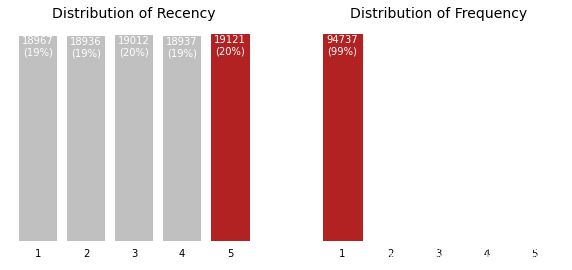

In [241]:
# График распределения по оценка R и F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# График распределения дохода для RF оценок
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

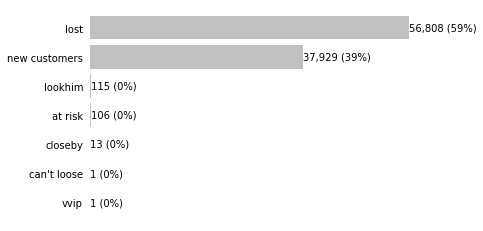

In [242]:
# Количество покупателей в каждом сегменте
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

#### По данным распределениям можно сделать выводы что основной доход компании с разовых продаж, т.е. у нас много новых покупателей ежемесячно, но лишь единицы возвращаются. Более 59% покупателей сделали покупку и больше не вернулись.

Есть большое желание сделать сравнение год к году, чтобы посмотреть как меняется портрет компании от года к году. Но это уже в следующем сезоне.